# EARTHQUAKE AROUND THE WORLD 1965 - 2016

Hello! Welcome to my Notebook.

Notebook ini merupakan bagian dari tugas *MILESTONE 1* yang dibuat oleh **Asta Zeska Dimitri** dari Batch **001-HCK**.

Link Dashboard : `https://public.tableau.com/views/h8dsft_Milestone1_Asta_Dimitri/DataVisualization?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link`

## Background

Bumi tersusun dari lempengan-lempengan tektonik yang terus bergerak tentu saja tidak lepas dari fenomena alam yang bernama gempa bumi. Gempa bumi adalah getaran atau guncangan yang terjadi di permukaan bumi akibat pelepasan energi dari bawah permukaan secara tiba-tiba yang menciptakan gelombang seismik. Gempa bumi bisa disebabkan oleh pergerakan lempeng bumi, letusan gunung api ataupun ledakan yang sangat besar.
Lalu, mengapa data yang digunakan mulai dari tahun 1965? Pada tanggal 27 Maret 1964, gempa bumi dengan magnitude 9.2 mengguncang Alaska hingga menyebabkan tsunami setinggi 67 meter. Ini juga merupakan gempa terbesar kedua yang terekam setelah gempa Chile di tahun 1960 dengan magnitude 9.5. Kedua gempa besar inilah yang membuat para peneliti bumi menjadi tertarik untuk mempelajari tentang gempa bumi dan memulai perekaman data gempa secara keseluruhan.

## Problem Statement

*Mengetahui karakteristik serta lokasi gempa bumi yang terjadi di dunia pada tahun 1965 sampai dengan 2016.*

## Problem Explanation

- Seberapa sering gempa bumi terjadi?
- Apakah semua gempa bumi yang terjadi berasal dari aktivitas lempeng tektonik?
- Berapa kekuatan/magnitude terbesar dari gempa bumi yang pernah terjadi? 
- Dimana saja lokasi terjadinya gempa bumi? Wilayah manakah yang lebih sering mengalami gempa bumi?
- Pada kedalaman berapa saja gempa bumi terjadi?
- Apakah ada hubungan antara kedalaman gempa dengan dengan besar magnitude-nya?

## The Data

Untuk data yang digunakan kali ini adalah data **Significant Earthquakes, 1965-2016** dari The National Earthquake Information Center, USGS. Data ini tersedia di kaggle.com dengan link `https://www.kaggle.com/datasets/usgs/earthquake-database`.

Untuk kolom tabel yang digunakan adalah Date, Time, Latitude, Longitude, Type, Depth, dan Magnitude.

## Import Library

Memasukkan library-library yang akan digunakan dalam pengolahan data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from scipy import stats

## Data Loading

In [2]:
# Memilih kolom-kolom yang ingin digunakan dalam pengolahan data

columns = ['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Magnitude']
df = pd.read_csv('earthquake.csv', usecols=columns)

In [3]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,6.0
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,5.8
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,5.8


## Data Cleaning and Overview

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       23412 non-null  object 
 1   Time       23412 non-null  object 
 2   Latitude   23412 non-null  float64
 3   Longitude  23412 non-null  float64
 4   Type       23412 non-null  object 
 5   Depth      23412 non-null  float64
 6   Magnitude  23412 non-null  float64
dtypes: float64(4), object(3)
memory usage: 1.3+ MB


In [5]:
df.isnull().sum()

Date         0
Time         0
Latitude     0
Longitude    0
Type         0
Depth        0
Magnitude    0
dtype: int64

Pada data yang digunakan tidak ditemukan adanya missing value.

In [6]:
# Mengecek apakah ada format tanggal yang berbeda pada kolom Date

dates = df['Date'].str.len()
dates.value_counts()

10    23409
24        3
Name: Date, dtype: int64

In [7]:
wrongdates = np.where([dates == 24])[1]
wrongdates
df.loc[wrongdates]

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude
3378,1975-02-23T02:58:41.000Z,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,5.6
7512,1985-04-28T02:53:41.530Z,1985-04-28T02:53:41.530Z,-32.998,-71.766,Earthquake,33.0,5.6
20650,2011-03-13T02:23:34.520Z,2011-03-13T02:23:34.520Z,36.344,142.344,Earthquake,10.1,5.8


In [8]:
# Mengubah format tanggal dan juga tipe datanya menjadi datetime

df.loc[3378, 'Date'] = '02/23/1975'
df.loc[7512, 'Date'] = '04/28/1985'
df.loc[20650, 'Date'] = '03/13/2011'
df['Date']= pd.to_datetime(df["Date"])


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       23412 non-null  datetime64[ns]
 1   Time       23412 non-null  object        
 2   Latitude   23412 non-null  float64       
 3   Longitude  23412 non-null  float64       
 4   Type       23412 non-null  object        
 5   Depth      23412 non-null  float64       
 6   Magnitude  23412 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 1.3+ MB


In [10]:
# Mengecek apakah ada format jam yang berbeda pada kolom Time

times = df['Time'].str.len()
times.value_counts()

8     23409
24        3
Name: Time, dtype: int64

In [11]:
wrongtimes = np.where([times == 24])[1]
wrongtimes
df.loc[wrongtimes]

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude
3378,1975-02-23,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,5.6
7512,1985-04-28,1985-04-28T02:53:41.530Z,-32.998,-71.766,Earthquake,33.0,5.6
20650,2011-03-13,2011-03-13T02:23:34.520Z,36.344,142.344,Earthquake,10.1,5.8


In [12]:
# Mengubah format jam dan juga tipe datanya menjadi timedelta

df.loc[3378, "Time"] = "02:58:41"
df.loc[7512, "Time"] = "02:53:41"
df.loc[20650, "Time"] = "02:23:34"
df['Time']= pd.to_timedelta(df['Time'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype          
---  ------     --------------  -----          
 0   Date       23412 non-null  datetime64[ns] 
 1   Time       23412 non-null  timedelta64[ns]
 2   Latitude   23412 non-null  float64        
 3   Longitude  23412 non-null  float64        
 4   Type       23412 non-null  object         
 5   Depth      23412 non-null  float64        
 6   Magnitude  23412 non-null  float64        
dtypes: datetime64[ns](1), float64(4), object(1), timedelta64[ns](1)
memory usage: 1.3+ MB


Pada data ditemukan adanya format yang berbeda pada kolom Date dan Time. Selanjutnya dilakukan penyamaan format dan perubahan tipe data dari object menjadi datetime64 dan timedelta64.

In [14]:
df.describe()

,Time,Latitude,Longitude,Depth,Magnitude
count,23412,23412.000000,23412.000000,23412.000000,23412.000000
mean,0 days 11:56:38.940116179,1.679033,39.639961,70.767911,5.882531
std,0 days 06:53:49.982249887,30.113183,125.511959,122.651898,0.423066
min,0 days 00:00:03,-77.080000,-179.997000,-1.100000,5.500000
25%,0 days 05:58:38.500000,-18.653000,-76.349750,14.522500,5.600000
50%,0 days 11:54:51.500000,-3.568500,103.982000,33.000000,5.700000
75%,0 days 17:57:18.250000,26.190750,145.026250,54.000000,6.000000
max,0 days 23:59:58,86.005000,179.998000,700.000000,9.100000


Ada beberapa informasi yang bisa kita ambil mengenai data yang digunakan, yaitu:
- Magnitude gempa bumi yang terjadi berada pada rentang 5.5 - 9.1, dengan rata-rata magnitude sebesar 5.9.
- Kedalaman gempa bumi yang terjadi berada pada rentang -1.1 - 700 km, dengan rata-rata kedalaman 70.7 km.
- Ada nilai yang cukup unik pada kolom Depth yaitu ditemukannya nilai minus. Nilai ini akan dihapus karena merupakan invalid value, gempa bumi tidak mungkin terjadi di atas permukaan bumi.

In [15]:
df.query("Depth < 0")

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude
8099,1986-07-21,0 days 22:07:16,37.621333,-118.3425,Earthquake,-0.076,5.60
10977,1992-06-28,0 days 11:57:34,34.200000,-116.4370,Earthquake,-0.097,7.30
10978,1992-06-28,0 days 12:00:45,34.131000,-116.4080,Earthquake,-1.100,5.77


In [16]:
# Melakukan proses penghapusan baris yang mengandung nilai negatif

df.drop(df[df['Depth'] < 0].index, inplace=True)

In [17]:
df.reset_index(inplace=True)
df

,index,Date,Time,Latitude,Longitude,Type,Depth,Magnitude
0,0,1965-01-02,0 days 13:44:18,19.2460,145.6160,Earthquake,131.60,6.0
1,1,1965-01-04,0 days 11:29:49,1.8630,127.3520,Earthquake,80.00,5.8
2,2,1965-01-05,0 days 18:05:58,-20.5790,-173.9720,Earthquake,20.00,6.2
3,3,1965-01-08,0 days 18:49:43,-59.0760,-23.5570,Earthquake,15.00,5.8
4,4,1965-01-09,0 days 13:32:50,11.9380,126.4270,Earthquake,15.00,5.8
...,...,...,...,...,...,...,...,...
23404,23407,2016-12-28,0 days 08:22:12,38.3917,-118.8941,Earthquake,12.30,5.6
23405,23408,2016-12-28,0 days 09:13:47,38.3777,-118.8957,Earthquake,8.80,5.5
23406,23409,2016-12-28,0 days 12:38:51,36.9179,140.4262,Earthquake,10.00,5.9
23407,23410,2016-12-29,0 days 22:30:19,-9.0283,118.6639,Earthquake,79.00,6.3


## Data Analysis

### - Melihat persebaran nilai data Magnitude dan Depth

In [18]:
# Melihat Central Tendency dari nilai data Magnitude

df['Magnitude'].agg([np.mean, np.median, np.min, np.max])

mean      5.882487
median    5.700000
amin      5.500000
amax      9.100000
Name: Magnitude, dtype: float64

In [19]:
# Melihat Central Tendency dari nilai data Depth

df['Depth'].agg([np.mean, np.median, np.min, np.max])

mean       70.777035
median     33.000000
amin        0.000000
amax      700.000000
Name: Depth, dtype: float64

c:\Users\astaz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


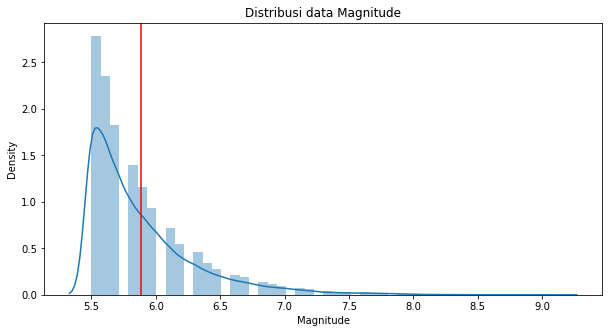

In [20]:
# Melihat persebaran data kolom Magnitude

mean_M = df['Magnitude'].mean()
plt.figure(figsize=(10, 5))
M_plot = sns.distplot(df['Magnitude'])
M_plot.set_title('Distribusi data Magnitude')
plt.axvline(mean_M, color="Red", label="Mean")

c:\Users\astaz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


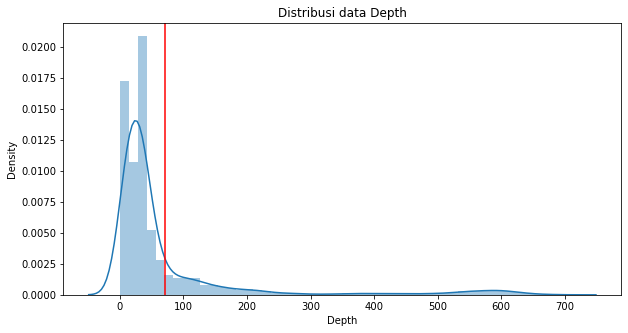

In [21]:
# Melihat persebaran data kolom Depth

mean_D = df['Depth'].mean()
plt.figure(figsize=(10, 5))
D_plot = sns.distplot(df['Depth'])
D_plot.set_title('Distribusi data Depth')
plt.axvline(mean_D, color="Red", label="Mean")

Dapat dilihat bahwa gempa bumi yang sering terjadi adalah gempa bumi dengan magnitude kecil, dengan rentang dari 5.5-9.1 dan rata-rata magnitude sebesar 5.88. Lalu untuk kedalaman gempa tersebar dari 0 sampai 700 km, mayoritas terjadi pada rentang kedalaman 10-40 km, dengan kedalaman rata-rata ada di 70.78 km. Dan, dari grafik diatas dapat terlihat bahwa persebaran kedua datanya sama-sama right skew. Namun disini kita tidak melakukan pembersihan outliers dikarenakan nilai extreme disini dapat dikonfirmasi kebenaran datanya

### - Mencari frekuensi kejadian gempa selama tahun 1965-2016

- Berdasarkan kejadian per hari

In [22]:
# Mengelompokkan gempa bumi yang terjadi berdasarkan tanggalnya

freq_date = df.groupby('Date')['Magnitude'].count().sort_values(ascending=False)
freq_date

Date
2011-03-11    128
2004-12-26     51
2010-02-27     39
2013-02-06     27
2006-11-15     25
             ... 
1988-04-24      1
1988-04-14      1
1988-04-11      1
1988-04-09      1
2016-12-30      1
Name: Magnitude, Length: 12398, dtype: int64

In [23]:
date_mean = freq_date.mean()
print('Rata-rata gempa bumi yang terjadi per hari adalah {:.2f}'.format(freq_date.mean()))

Rata-rata gempa bumi yang terjadi per hari adalah 1.89


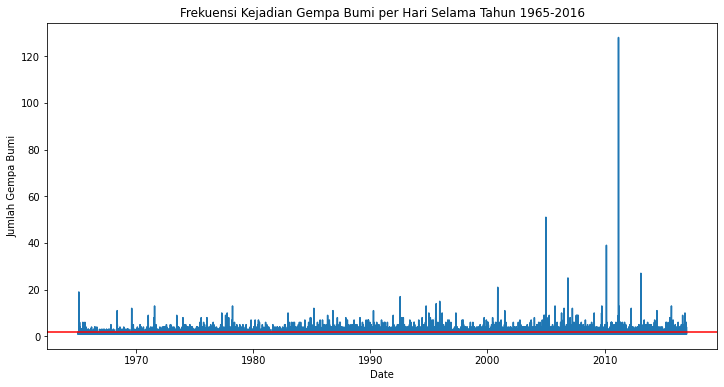

In [24]:
# Visualisasi frekuensi gempa bumi per hari

plt.figure(figsize=(12,6))
freq = sns.lineplot(data=freq_date)
freq.set_title('Frekuensi Kejadian Gempa Bumi per Hari Selama Tahun 1965-2016')
freq.set_ylabel('Jumlah Gempa Bumi')
plt.axhline(date_mean, color="Red", label="Mean")

Terlihat dari grafik bahwa ada beberapa tanggal dengan frekuensi gempa bumi yang sangat tinggi jika dibandingkan dengan rata-ratanya yang sebesar 1.89 kejadian per hari. Setelah dilakukan penelusuran lebih lanjut, ditemukan adanya hal menarik yang berkaitan dengan frekuensi gempa tinggi ini.
- Tanggal 11 Maret 2011 ada 128 gempa bumi, ini merupakan tanggal yang sama dengan kejadian gempa bumi dan tsunami di Tohoku Jepang dengan magnitude 9.0
- Tanggal 26 Desember 2004 ada 51 gempa bumi, ini merupakan tanggal yang sama dengan kejadian gempa bumi dan tsunami di Samudra Hindia dengan magnitude 9.1
- Tanggal 27 Februari 2010 ada 39 gempa bumi, ini merupakan tanggal yang sama dengan kejadian gempa bumi di Chile dengan magnitude 8.8
- Tanggal 6 Februari 2013 ada 27 gempa bumi, ini merupakan tanggal yang sama dengan kejadian gempa bumi di Kepulauan Solomon dengan magnitude 8.0
- Tanggal 15 November 2006 ada 25 gempa bumi, ini merupakan tanggal yang sama dengan kejadian gempa bumi di Kepulauan Kuril dengan magnitude 8.3

Dari sini dapat terlihat bahwa ada hubungan antara gempa bumi ber-magnitude besar (>8) dengan banyaknya gempa yang terjadi pada hari itu. Gempa bumi ber-magnitude besar ini biasanya akan diikuti dengan gempa bumi susulan dengan jumlah yang banyak namun kekuatannya lebih kecil. Hal ini wajar terjadi karena dalam gempa terjadi sebuah deformasi yaitu patahan batuan. Dalam gempa bumi ber-magnitude besar, deformasi yang terjadi pun skalanya semakin besar. Lapisan batuan akan menjadi tidak stabil dan akan ikut berdeformasi juga dalam skala yang lebih kecil, deformasi-deformasi kecil inilah yang biasanya menyebabkan gempa bumi susulan.  

- Berdasarkan kejadian per tahun

In [25]:
# Mengelompokkan gempa bumi yang terjadi berdasarkan tahunnya

freq_year = df.groupby(df.Date.dt.year)['Magnitude'].count()
year_mean = freq_year.mean()
print('Rata-rata gempa bumi yang terjadi per tahun adalah {:.2f}'.format(year_mean))

Rata-rata gempa bumi yang terjadi per tahun adalah 450.17


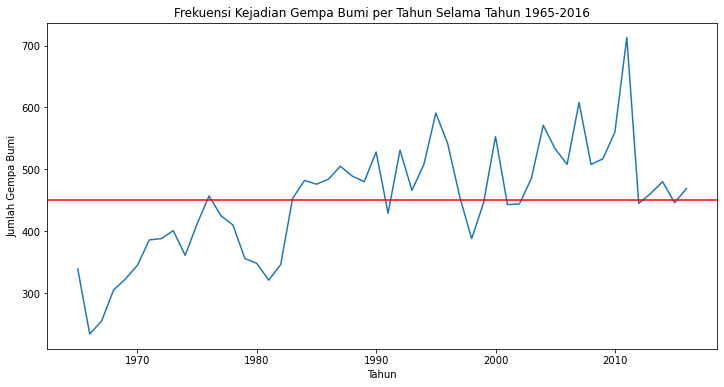

In [26]:
# Visualisasi frekuensi gempa bumi per tahun

plt.figure(figsize=(12,6))
freq = sns.lineplot(data=freq_year)
freq.set_title('Frekuensi Kejadian Gempa Bumi per Tahun Selama Tahun 1965-2016')
freq.set_xlabel('Tahun')
freq.set_ylabel('Jumlah Gempa Bumi')
plt.axhline(year_mean, color="Red", label="Mean")

In [27]:
big = df.query("Magnitude >= 7").groupby(df.Date.dt.year)['Magnitude'].count()
big.sort_values(ascending=False).head(3)

Date
2010    24
1968    22
2011    20
Name: Magnitude, dtype: int64

Jika ditinjau berdasarkan kejadian per tahun, maka terlihat bahwa trend frekuensinya semakin meningkat. Hal ini mungkin disebabkan oleh masih belum banyak stasiun-stasiun perekaman gempa sebelum tahun 1970 sehingga tidak semua data gempa bumi terekam. Lalu terlihat bahwa pada tahun 2010-2011 frekuensi gempa buminya sangat tinggi, setelah dianalisa lebih lanjut ditemukan bahwa pada tahun 2010-2011 juga banyak terjadi gempa bumi dengan magnitude >= 7.0. Hal ini sesuai dengan analisa sebelumnya bahwa gempa bumi dengan magnitude besar akan menghasilkan banyak gempa bumi susulan, sehingga frekuensi gempa bumi yang terjadi pada tahun 2010-2011 akan ikut meningkat juga. 

### - Melihat jenis-jenis penyebab terjadinya gempa bumi pada tahun 1965-2016

In [28]:
tipe = df['Type'].value_counts()
tipe

Earthquake           23229
Nuclear Explosion      175
Explosion                4
Rock Burst               1
Name: Type, dtype: int64

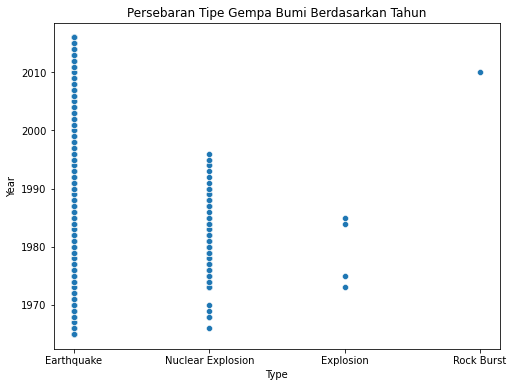

In [29]:
# Visualisasi persebaran tipe gempa bumi berdasarkan tahun

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Type', y=df.Date.dt.year, data=df)
plt.xlabel("Type")
plt.ylabel("Year")
plt.title("Persebaran Tipe Gempa Bumi Berdasarkan Tahun")
plt.show()

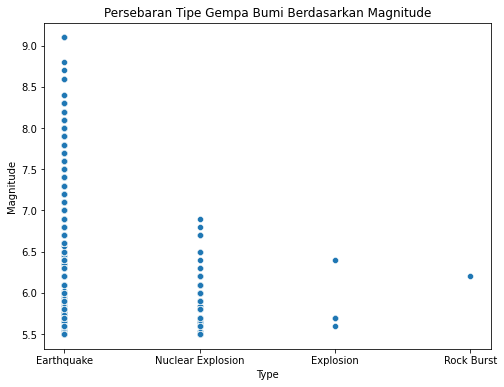

In [30]:
# visualisasi persebaran tipe gempa bumi berdasarkan magnitude

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Type', y=df.Magnitude, data=df)
plt.xlabel("Type")
plt.ylabel("Magnitude")
plt.title("Persebaran Tipe Gempa Bumi Berdasarkan Magnitude")
plt.show()

Dari informasi di atas diketahui bahwa gempa bumi yang terekam tidak hanya berasal dari aktivitas lempeng tektonik atau volkanik, namun juga ada gempa bumi yang berasal dari perbuatan manusia seperti ledakan atau runtuhan bebatuan pada galian tambang. Dan kekuatan magnitudenya bisa cukup besar juga mencapai 7.0.

### - Persebaran lokasi terjadinya gempa bumi

Awalnya sudah dicoba untuk melakukan plotting map dengan menggunakan library folium, namun karena jumlah titik koordinat yang di-plot terlalu banyak menyebabkan notebook ini berhenti bekerja. Sehingga untuk plotting map memakai bantuan platform Tableau.

In [31]:
# Mengekspor data csv untuk melakukan plotting di Tableau

df.to_csv('longlat.csv', encoding='utf-8', index=False)

Persebaran lokasi gempa dengan indikator magnitude.

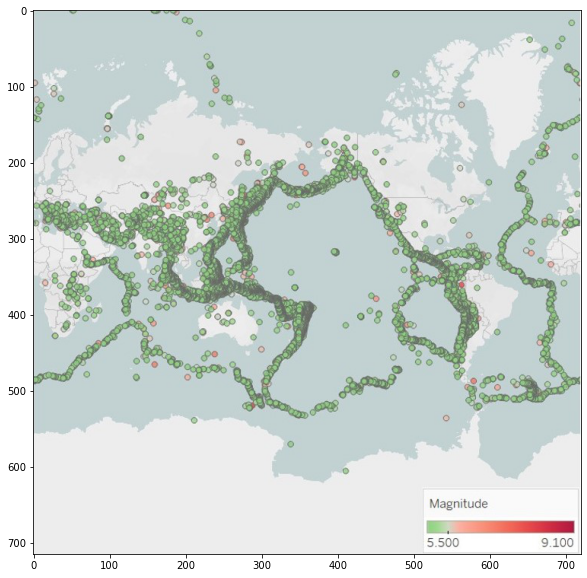

In [32]:
M_img = plt.imread('magfix.jpg')
plt.figure(figsize=(10,10))
plt.imshow(M_img)

Persebaran lokasi gempa dengan indikator depth.

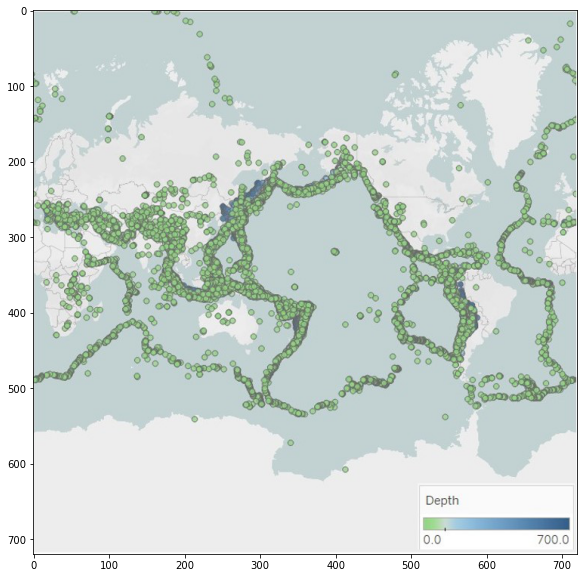

In [33]:
D_img = plt.imread('depfix.jpg')
plt.figure(figsize=(10,10))
plt.imshow(D_img)

Gambar peta di atas menunjukkan persebaran lokasi gempa bumi yang terjadi, terlihat bahwa gempa bumi terjadi pada lokasi-lokasi tertentu secara terus menerus hingga nampak seperti tumpukan dan membentuk suatu pola. Pola yang terbentuk ini sebenarnya adalah lokasi pertemuan antara lempeng-lempeng tektonik yang menyusun bumi ini. Karena lempeng-lempeng tektonik ini aktif dan terus bergerak menabrak satu sama lain maka terjadilah gempa bumi. 

### - Apakah ada hubungan antara magnitude gempa bumi dengan kedalamannya?

Kita ingin mengetahuin apakah ada hubungan antara magnitude gempa bumi dengan kedalamannya. Untuk mengetahuinya dapat kita lakukan tes hipotesis dengan metode Pearson's.

**H0 : There is a relation between magnitude and depth**

**H1 : There is no relation between magnitude and depth**

In [34]:
from scipy.stats import pearsonr

stat, p = pearsonr(df['Magnitude'], df['Depth'])
print('stat={:.3f}, p={:.3f}'.format(stat, p))
if p > 0.05:
    print('There is a relation between magnitude and depth')
else:
    print('There is no relation between magnitude and depth')

stat=0.024, p=0.000
There is no relation between magnitude and depth


Dari hasil hipotesis testing dengan metode Pearson's didapatkan p-value kurang dari 0.05 yang berarti hipotesis awal ditolak. Antara magnitude dan depth tidak berhubungan. Hal ini juga sesuai dengan yang kita lihat dari awal bahwa kebanyakan gempa terjadi pada kedalaman 10-40 meter dengan nilai magnitude-nya bervariasi dari kecil sampai besar.

## Conclusions

Dari analisa yang sudah dilakukan, didapatkan beberapa informasi mengenai karakteristik gempa bumi yang terjadi di seluruh dunia pada tahun 1965 sampai dengan 2016.
- Gempa bumi dengan magnitude kecil lebih sering terjadi dibandingkan dengan gempa bumi dengan magnitude besar.
- Gempa bumi yang terjadi berada pada kedalaman 0-700 km, dengan mayoritas gempa bumi terjadi pada kedalaman 10-40 km.
- Gempa bumi dengan magnitude besar biasanya akan diikuti dengan banyaknya gempa bumi susulan namun dengan magnitude yang lebih kecil.
- Penyebab gempa bumi tidak hanya berasal dari aktivitas alami bumi seperti tabrakan lempeng namun ada juga gempa bumi yang berasal dari perbuatan manusia seperti ledakan, ataupun runtuhan bebatuan pada galian.
- Lokasi terjadinya gempa bumi banyak berkumpul pada daerah-daerah tertentu saja seperti pola, pola ini merupakan lokasi pertemuan antara lempeng-lempeng tektonik penyusun bumi.
- Tidak ditemukan adanya hubungan antara kekuatan magnitude gempa dengan kedalamannya, kebanyakan gempa yang terjadi berada pada kedalaman 10-40 km dengan magnitude yang bervariasi dari kecil ke besar.